In [13]:
import chess
from main_stockfish import StockFish
from pgntofen import PgnToFen
from IPython.display import display, clear_output
from analysis_prompter import *


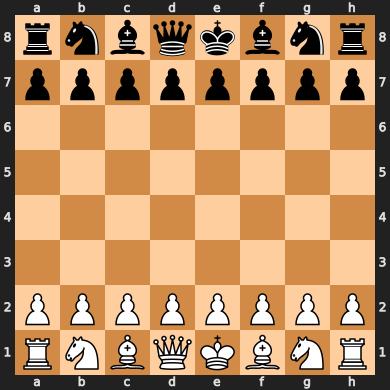

Extracting the Json
Here is an analysis of the board
{
    "Material Balance": "Equal material or slight differences not specified.",
    "King Safety": "Both kings appear secure, no immediate threats.",
    "Piece Activity": "Depends on specific positions, but generally assesses which side has more active pieces.",
    "Pawn Structure": "Assessment varies, could be symmetrical, damaged, or have weaknesses.",
    "Immediate Threats": "None specified, implies no immediate captures or checks."
}
Here is some analysis of some potential moves
1. **e2e4**: Opens lines for the queen and bishop, controlling the center. A classical and strong opening move that aims for central dominance and quick development.

2. **g1f3**: Develops a knight towards the center, preparing for both offensive and defensive play. It's a flexible move that doesn't commit the pawn structure too early.

3. **d2d4**: Another central pawn move aiming to control the center and open lines for the bishop and queen. It mirr

KeyboardInterrupt: Interrupted by user

In [22]:
###########For playing a full game ##############

#stockfish initialisation
sf = StockFish(elo=1500)
black_sf = StockFish(elo=2000)

#create new game for python chess
board = chess.Board()

pgn = []
first_move = True
while True:
    
    display(board)
    color = check_turn(pgn)
    str_pgn = format_pgn(pgn)

    #prompt = board_analysis_prompt(str_pgn, color)
    fen = board.fen()
    top_moves = sf.get_top_moves(fen)

    # query chatgpt
    board_prompt = board_analysis_prompt(str_pgn, color)
    move_prompt = move_analysis_prompt(str_pgn, color, top_moves)

    move_output = query_gpt(move_prompt)
    board_output = extract_json(query_gpt(board_prompt))
    # move_output = ''
    # board_output = []
    
    print("Here is an analysis of the board")
    print(json.dumps(board_output, indent=4))
    print("Here is some analysis of some potential moves")
    print(move_output)

    valid_move = False
  
    while not valid_move:
        
        player_move = input('Enter move: ')
        try:
            move = board.parse_san(player_move)
            if move in board.legal_moves:
                move_san = board.san(move)
                board.push(move)
                pgn.append(move_san)
                first_move=False
                
                valid_move = True
            else:
                print("This move is not legal. Please try again.")
        except ValueError:
            print("Invalid move format or the move is not legal. Please try again.")
    
    
    #get FEN for updated board position
    fen = board.fen()
    #set stockfish position
    #ask stockfish for top 3 moves
    top_moves = black_sf.get_top_moves(fen, 1)
    #apply top stock fish move and re-render board
    stockfish_move = top_moves[0]
    print(stockfish_move)
    
    sf_san_move = board.san(chess.Move.from_uci(stockfish_move))
    print(sf_san_move)
    san = board.push_san(sf_san_move)
    pgn.append(sf_san_move)
    clear_output()
    print(pgn)

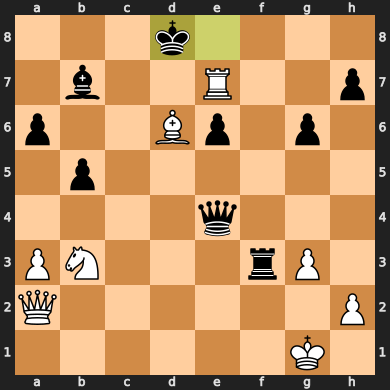

White
1. d4 e6 2. c4 Nf6 3. Nc3 Bb4 4. Nf3 Nc6 5. a3 Bxc3+ 6. bxc3 d5 7. e3 Rg8 8. Be2 Ne4 9. Qb3 dxc4 10. Bxc4 Na5 11. Qb4 Nc6 12. Qb3 Na5 13. Qb4 Nxc4 14. Qxc4 Bd7 15. O-O Bc6 16. Nd2 Nd6 17. Qb3 Qg5 18. g3 O-O-O 19. c4 Qg4 20. f3 Qh5 21. Rb1 b6 22. Bb2 a6 23. Rf2 Kd7 24. e4 Ke7 25. d5 Bb7 26. dxe6 fxe6 27. c5 Qxc5 28. Rc1 Qa5 29. Rxc7+ Rd7 30. Rxd7+ Kxd7 31. Bd4 b5 32. Qa2 Qa4 33. Nb3 Ke8 34. Rc2 g6 35. Rc7 Rf8 36. Bc5 Rxf3 37. Bxd6 Qxe4 38. Re7+ Kd8 
Extracting the Json
Here is an analysis of the board
{
    "Material Balance": "Equal material, but White has a significant advantage due to better piece activity and the advanced position of its pieces.",
    "King Safety": "Black's king is more exposed, especially after 38...Kd8. White's king is safer, with no immediate threats.",
    "Piece Activity": "White's pieces are more active and coordinated. The rook on c7 is particularly strong, and the knight on b3 supports potential threats. Black's pieces are less coordinated, and the ro

In [24]:
############## single board analysis ##################

sf = StockFish(elo=2000)

board = chess.Board()

pgn = "d4 e6 c4 Nf6 Nc3 Bb4 Nf3 Nc6 a3 Bxc3+ bxc3 d5 e3 Rg8 Be2 Ne4 Qb3 dxc4 Bxc4 Na5 Qb4 Nc6 Qb3 Na5 Qb4 Nxc4 Qxc4 Bd7 O-O Bc6 Nd2 Nd6 Qb3 Qg5 g3 O-O-O c4 Qg4 f3 Qh5 Rb1 b6 Bb2 a6 Rf2 Kd7 e4 Ke7 d5 Bb7 dxe6 fxe6 c5 Qxc5 Rc1 Qa5 Rxc7+ Rd7 Rxd7+ Kxd7 Bd4 b5 Qa2 Qa4 Nb3 Ke8 Rc2 g6 Rc7 Rf8 Bc5 Rxf3 Bxd6 Qxe4 Re7+ Kd8"
for move in pgn.split(' '):
    move = board.parse_san(move)
    board.push(move)
display(board)

color = check_turn(pgn.split(' '))
print(color)
str_pgn = format_pgn(pgn.split(' '))

fen = board.fen()
top_moves = sf.get_top_moves(fen)

print(str_pgn)
board_prompt = board_analysis_prompt(str_pgn, color)
move_prompt = move_analysis_prompt(str_pgn, color, top_moves)

move_output = query_gpt(move_prompt)
board_output = extract_json(query_gpt(board_prompt))
# move_output = ''
# board_output = []

print("Here is an analysis of the board")
print(json.dumps(board_output, indent=4))
print("Here is some analysis of some potential moves")
print(move_output)
